In [226]:
import numpy as np
import matplotlib.pyplot as plt

import jax
from functools import partial
import jax.numpy as jnp

plt.rcParams['figure.figsize'] = [12, 8]

import time
from tqdm import tqdm

from Dynamics import logistic_map, lorentz_map
from Kernels import ext_kernel
from Losses import rho_comp

from Optimizer import KernelSOS, flow_rho_relative
from DataManager import get_curr_data, sample_points

jax.config.update("jax_enable_x64", True)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
# Get the Dataset 
r = 4
curr_map = logistic_map(r)


x0 = 0.1
N = 200
traj = np.array(gen_traj(curr_map, x0, N))

X = traj[:-1].reshape(-1, 1)
Y = traj[1:]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.94it/s]


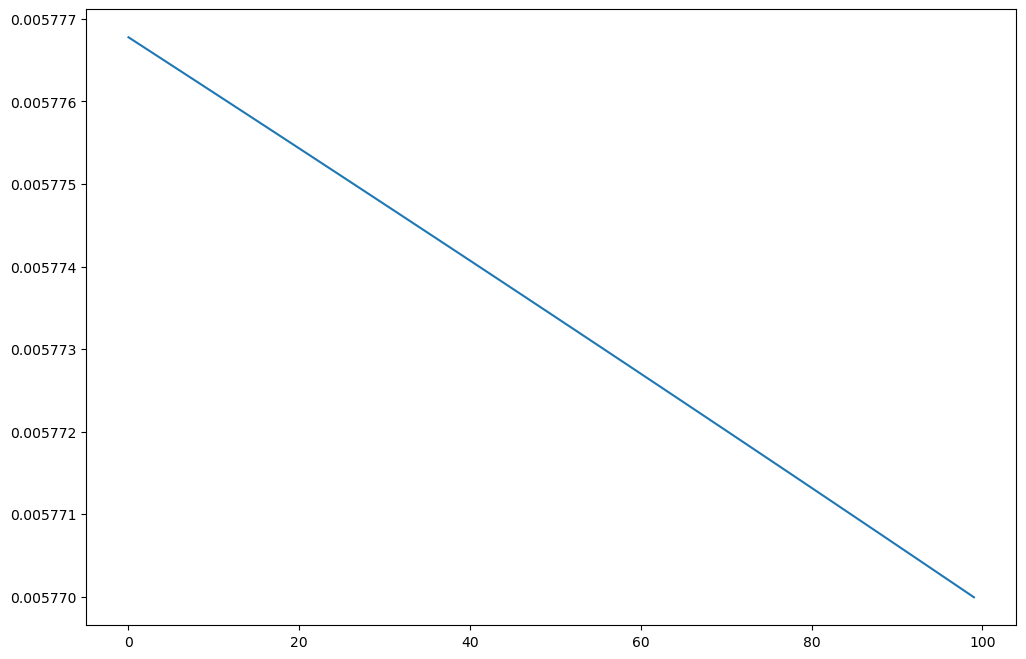

In [265]:

lr = 0.001
num_steps = 100

# theta = jnp.array([1.12829666, 0.99366733, 1.20643997, 1.20111822, 0.56178028,
#        0.80903366, 0.64937386, 1.06569675, 0.61720618, 1.36350779]) #jnp.ones(shape=10)
theta_0 = jnp.ones(shape=10)
k_func = ext_kernel

batch_size = 200
sub_size = 100
theta_star, losses = flow_rho_relative(theta_0, k_func, X, Y, batch_size, sub_size, num_steps, lr)

plt.plot(losses)

In [ ]:
Xb, Yb, Xc, Yc = get_curr_data(X, Y, 100, 50)

Xb.shape

In [267]:
X.shape

(1000, 3)

In [266]:
# x_vec_0 = [0, 1, 1.05]
x_vec_0 = [0.5, 1.5, 2.5]

traj = np.array(gen_traj(lorentz_map(), x_vec_0, 1000))

X = traj[:-1]
Y = traj[1:]

In [ ]:
Y_curr

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.48it/s]


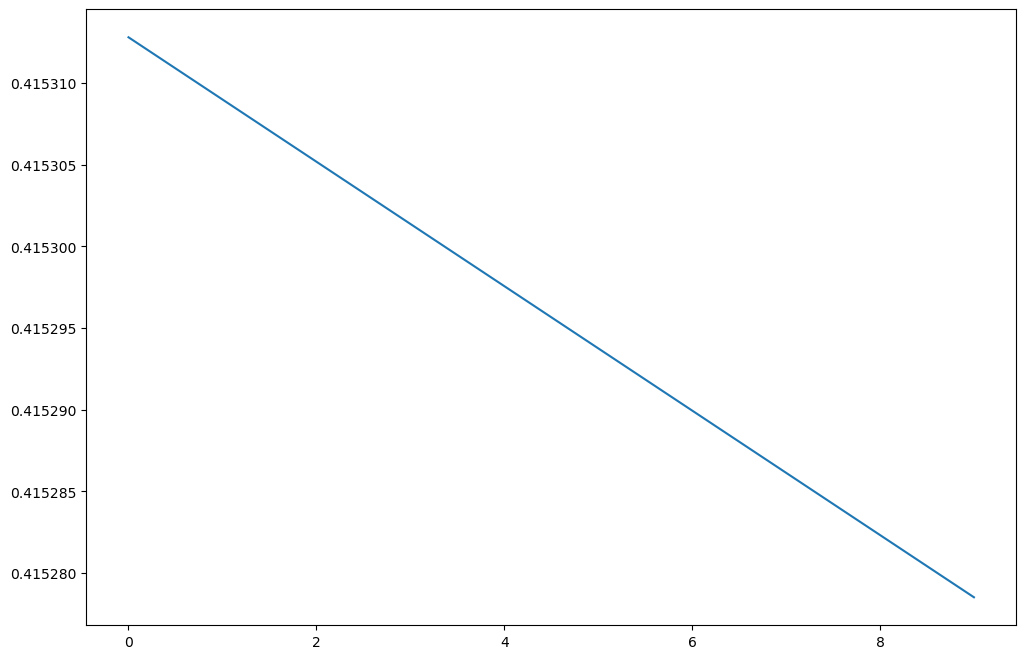

In [270]:
X = X
Y_curr = Y[:, 0]


lr = 0.001
num_steps = 10

# theta = jnp.array([1.12829666, 0.99366733, 1.20643997, 1.20111822, 0.56178028,
#        0.80903366, 0.64937386, 1.06569675, 0.61720618, 1.36350779]) #jnp.ones(shape=10)

k_func = ext_kernel

batch_size = 200
sub_size = 100
theta_star, losses = flow_rho_relative(theta_star, k_func, X, Y_curr, batch_size, sub_size, num_steps, lr)

plt.plot(losses)

In [ ]:

# Setup for Kernel SOS.
thetas = sample_points([[0.5, 1.5]] * 10, 100)

loss = lambda t: rho_comp(t, ext_kernel, X_batch, y_batch, X_sub, y_sub)


fs = jnp.array([loss(t) for t in tqdm(thetas)])
thetas = jnp.array(thetas)

In [240]:
# Initial Alpha

alpha = jnp.ones(len(fs)) # np.linspace(1, 10, len(fs))
alpha /= jnp.sum(alpha)
alpha

Array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01], dtype=float64)

In [248]:
alpha0 = jnp.ones(len(fs))
alpha0 /= jnp.sum(alpha0)
theta_star, res, alpha = KernelSOS(alpha0, thetas, fs, loss, N=50, lmbda=0.0001, eps=0.000001)

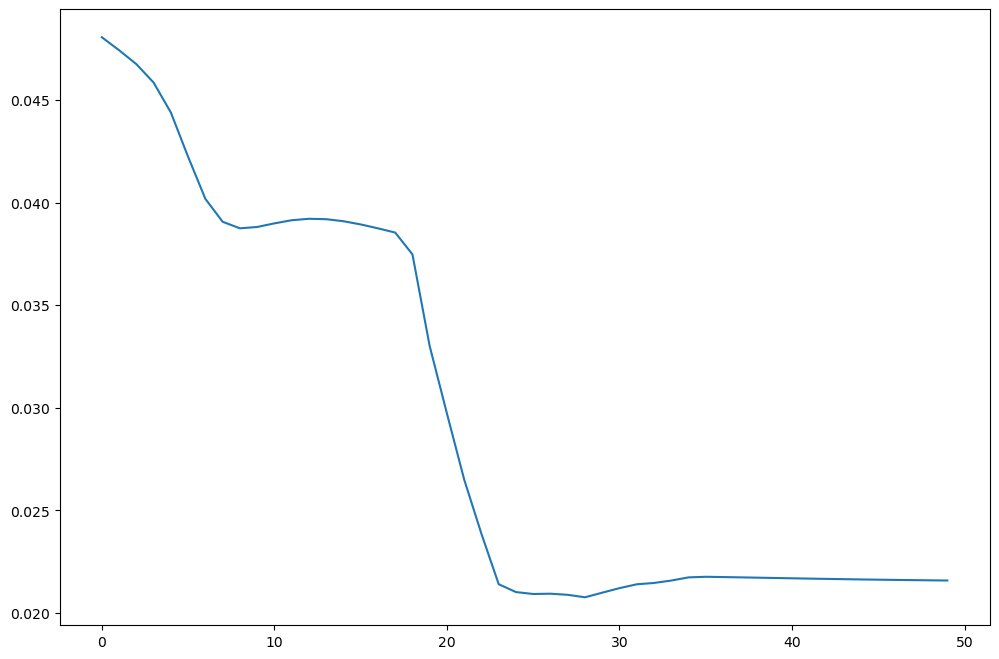

In [249]:
plt.plot(res[:, 1])

# General Plots

In [19]:
r = 4
x0 = 0.1
N = 100
traj = np.array(gen_traj(r, x0, N))

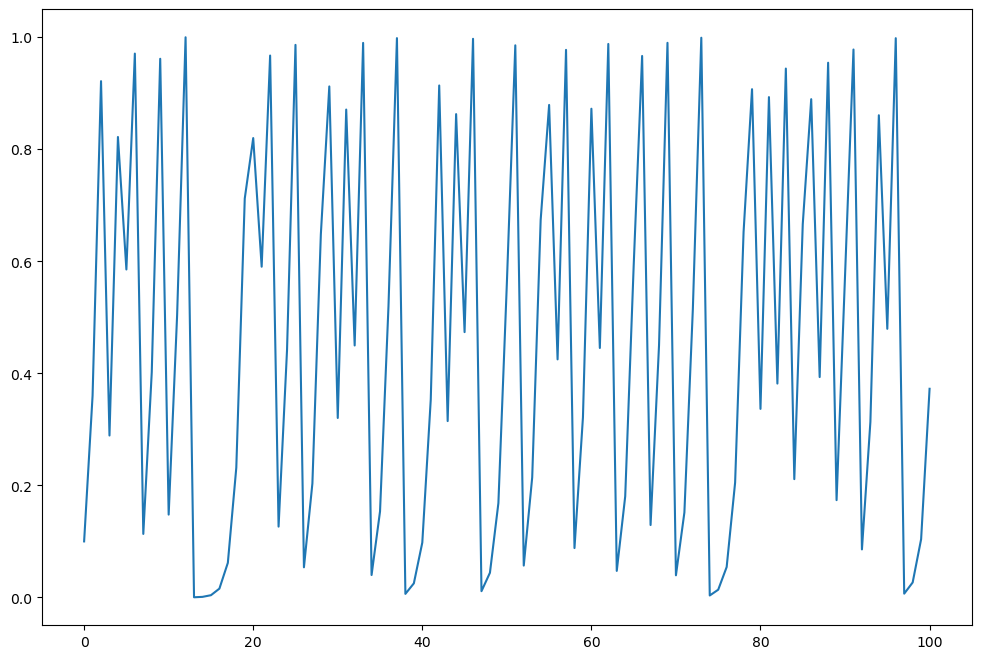

In [20]:
plt.plot(traj)

In [9]:
# bifurcations
N_init = 20
N_rs = 100

init_conds = np.linspace(0, 1, N_init)

rs = np.linspace(0, 4, N_rs)
maps = [logistic_map(r) for r in rs]

N_iters = 100

res = np.empty((N_iters, N_init, N_rs))


for i in range(N_iters):
    for j in range(N_init):
        for k in range(N_rs):
            if i == 0:
                res[i, j, k] = init_conds[j]
            else:
                res[i, j, k] = maps[k](res[i - 1, j, k])
                

               
        
        


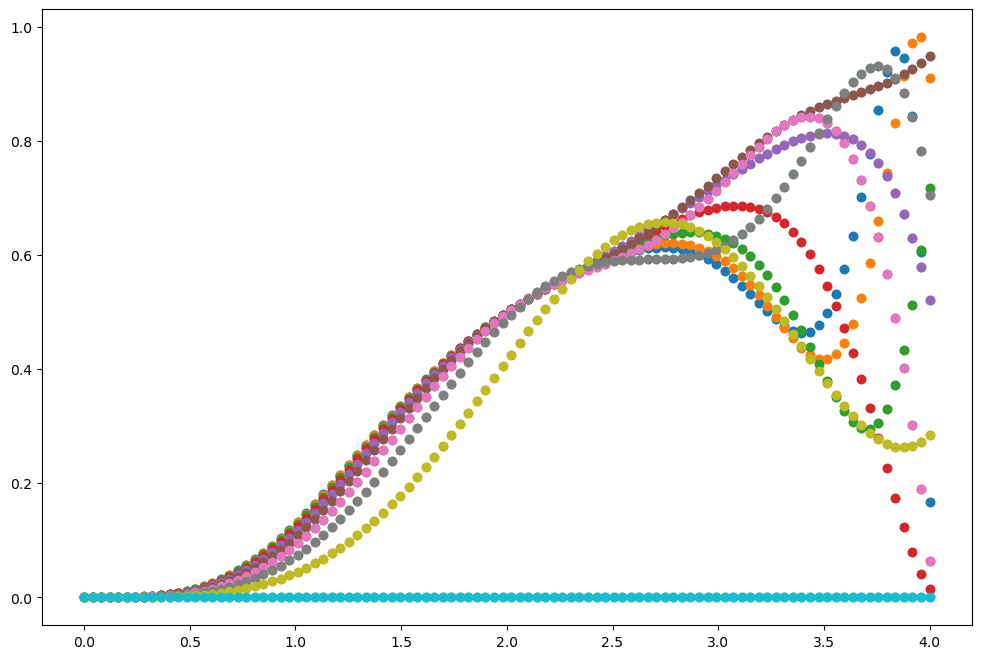

In [10]:
n_iter = 4

for j in range(N_init):
    plt.scatter(rs, res[n_iter, j, :])

In [ ]:


x0 = [0, 1, 1.05]
N = 10000

traj_train = np.array(gen_traj(lorentz_map(), x_vec_0, 10000))

N_sub = 500
idxs = np.random.choice(len(traj_train), N_sub)
X = traj_train[idxs]
Y = np.array([lorentz_map()(x) for x in X])

pred_funcs = [get_predict_func(K_lorentz_one(thetas[i]), X, Y[:, i]) for i in range(3)]

x0 = [0.5, 1.5, 2.5]

N_fore = 500
pred_vals = predict_series_3d(x0, pred_funcs, N_fore)
true_vals = np.array(gen_traj(lorentz_map(), x0, N_fore))


plt.plot(true_vals[:, 0])
plt.plot(pred_vals[:, 0])

plt.plot(true_vals[:, 0])
plt.plot(pred_vals[:, 0])

plt.plot(traj[:, 0])

# ------------ Probably delete right after here
pred_traj = np.empty(N)
pred_traj[0] = 0.3
# for i in range(len(X)):
#     pred_traj[i] = predict_f(X.reshape(-1, 1)[i])

for i in range(1, len(pred_traj)):
    pred_traj[i] =  predict_f(pred_traj.reshape(-1, 1)[i - 1])
    
plt.plot(pred_traj)
plt.plot(new_traj)
# plt.xlim(200, 250)